In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

In [2]:
import matplotlib.pyplot as plt

import matplotlib as mpl

import seaborn as sns

import pandas as pd

import numpy as np

from model.simulator import RunSingleTactic
from model.config_classes import SingleConfig
from model.utils import get_rfd

In [9]:
config_sing = SingleConfig(10, None, None, 1, 1, 1, 1, bs_sex_prop=0.5)
config_sing.load_saved = False
RR, RS, SR = (10**(-12), 10**(-3), 10**(-6))

config_sing.primary_inoculum = dict(
    RR=RR,
    RS=RS,
    SR=SR,
    SS=1 - RR - RS - SR
)

config_sing.add_string()

vars(config_sing)

{'load_saved': False,
 'save': True,
 'folder_runs': '../outputs/saved_runs/',
 'folder_figs': '../outputs/figures/',
 'bs_sex_prop': 0.5,
 'n_years': 10,
 'res_props': {'f1': None, 'f2': None},
 'primary_inoculum': {'RR': 1e-12,
  'RS': 0.001,
  'SR': 1e-06,
  'SS': 0.998998999999},
 'fung1_doses': {'spray_1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'spray_2': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 'fung2_doses': {'spray_1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'spray_2': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 'save_string': 'Ny=10_RPs=NA,_NA_PI=001,_1e-06,_1e-12_BSS=5_WSS=0',
 'config_string': '../outputs/saved_runs/single/Ny=10_RPs=NA,_NA_PI=001,_1e-06,_1e-12_BSS=5_WSS=0_doses=1,1,1,1.pickle',
 'config_string_img': '../outputs/figures/single/Ny=10_RPs=NA,_NA_PI=001,_1e-06,_1e-12_BSS=5_WSS=0_doses=1,1,1,1.png'}

In [10]:
output = RunSingleTactic().run(config_sing)

In [24]:
df = (
    pd.concat([
        pd.DataFrame(dict(
            t = output.states_list[1].t - 1212,
            
            PSS = output.states_list[0].PSS,
            PSR = output.states_list[0].PSR,
            PRS = output.states_list[0].PRS,
            PRR = output.states_list[0].PRR,

            ESS = output.states_list[0].ESS,
            ESR = output.states_list[0].ESR,
            ERS = output.states_list[0].ERS,
            ERR = output.states_list[0].ERR,

            ISS = output.states_list[0].ISS,
            ISR = output.states_list[0].ISR,
            IRS = output.states_list[0].IRS,
            IRR = output.states_list[0].IRR,
        ))
        .assign(year=1),
        pd.DataFrame(dict(
            t = output.states_list[1].t  - 1212 + 1688,
            
            PSS = output.states_list[1].PSS,
            PSR = output.states_list[1].PSR,
            PRS = output.states_list[1].PRS,
            PRR = output.states_list[1].PRR,

            ESS = output.states_list[1].ESS,
            ESR = output.states_list[1].ESR,
            ERS = output.states_list[1].ERS,
            ERR = output.states_list[1].ERR,

            ISS = output.states_list[1].ISS,
            ISR = output.states_list[1].ISR,
            IRS = output.states_list[1].IRS,
            IRR = output.states_list[1].IRR,
        ))
        .assign(year=2),
        pd.DataFrame(dict(
            t = output.states_list[2].t  - 1212 + 2*1688,
            
            PSS = output.states_list[2].PSS,
            PSR = output.states_list[2].PSR,
            PRS = output.states_list[2].PRS,
            PRR = output.states_list[2].PRR,

            ESS = output.states_list[2].ESS,
            ESR = output.states_list[2].ESR,
            ERS = output.states_list[2].ERS,
            ERR = output.states_list[2].ERR,

            ISS = output.states_list[2].ISS,
            ISR = output.states_list[2].ISR,
            IRS = output.states_list[2].IRS,
            IRR = output.states_list[2].IRR,
        ))
        .assign(year=3),
    ])
)

df

,t,PSS,PSR,PRS,PRR,ESS,ESR,ERS,ERR,ISS,ISR,IRS,IRR,year
0,0.000000,2.592640e-03,2.595238e-09,2.595238e-06,2.595238e-15,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
1,20.333333,2.181131e-03,2.183316e-09,2.183316e-06,2.183316e-15,0.000727,7.280024e-10,7.280024e-07,7.280024e-16,0.000028,2.852301e-11,2.852301e-08,2.852301e-17,1
2,40.666667,1.834937e-03,1.836776e-09,1.836776e-06,1.836776e-15,0.001302,1.303326e-09,1.303326e-06,1.303326e-15,0.000104,1.041791e-10,1.041791e-07,1.041791e-16,1
3,61.000000,1.543692e-03,1.545238e-09,1.545238e-06,1.545238e-15,0.001766,1.768153e-09,1.768153e-06,1.768153e-15,0.000215,2.151564e-10,2.151564e-07,2.151564e-16,1
4,81.333333,1.298674e-03,1.299975e-09,1.299975e-06,1.299975e-15,0.002153,2.155353e-09,2.155353e-06,2.155353e-15,0.000353,3.529411e-10,3.529411e-07,3.529411e-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,4984.571429,2.985833e-09,7.329680e-15,7.326374e-12,3.647707e-17,0.002574,9.890156e-09,9.885695e-06,7.121974e-10,0.012374,4.755891e-08,4.753746e-05,3.425095e-09,3
81,5004.428571,2.522103e-09,6.191307e-15,6.188514e-12,3.081181e-17,0.001444,5.550603e-09,5.548099e-06,3.997064e-10,0.011992,4.608927e-08,4.606848e-05,3.319252e-09,3
82,5024.285714,2.130395e-09,5.229734e-15,5.227375e-12,2.602642e-17,0.000632,2.428321e-09,2.427226e-06,1.748680e-10,0.011554,4.440725e-08,4.438722e-05,3.198116e-09,3
83,5044.142857,1.799523e-09,4.417504e-15,4.415511e-12,2.198426e-17,0.000191,7.357913e-10,7.354594e-07,5.298605e-11,0.011090,4.262186e-08,4.260263e-05,3.069535e-09,3


In [20]:
# plt.rcParams.keys()

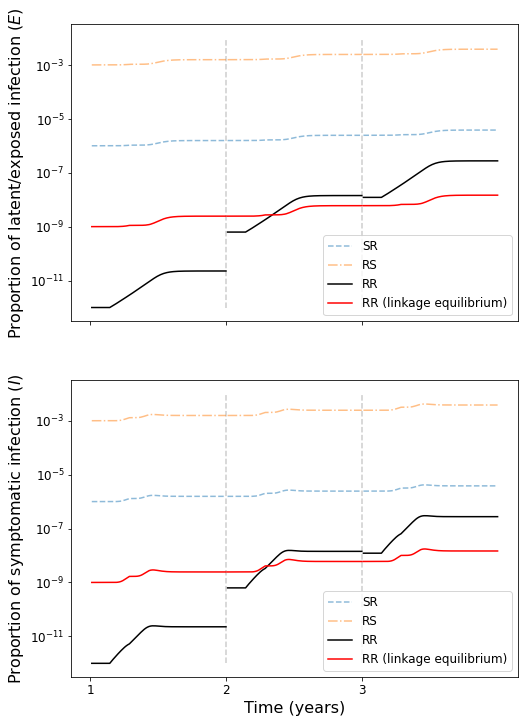

In [26]:
f, ax = plt.subplots(2, 1, figsize=(8,12))

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.titlesize': 14})
plt.rcParams.update({'axes.labelsize': 16})


dfE = df.assign(
    total = lambda x: x.ERR + x.ESR + x.ERS + x.ESS,
    SR = lambda x: x.ESR/x.total,
    RS = lambda x: x.ERS/x.total,
    RR = lambda x: x.ERR/x.total,
    LE = lambda x: np.vectorize(get_rfd)(x.SR, x.RS)
)

dfI = df.assign(
    total = lambda x: x.IRR + x.ISR + x.IRS + x.ISS,
    SR = lambda x: x.ISR/x.total,
    RS = lambda x: x.IRS/x.total,
    RR = lambda x: x.IRR/x.total,
    LE = lambda x: np.vectorize(get_rfd)(x.SR, x.RS)
)


dfE.plot(x='t', y='SR', alpha=0.5, ls='--', ax=ax[0])
dfE.plot(x='t', y='RS', alpha=0.5, ls='-.', ax=ax[0])
dfE.plot(x='t', y='RR', c='k', ls='-', ax=ax[0])
(
    dfE
    .rename(columns={'LE': 'RR (linkage equilibrium)'})
    .plot(x='t', y='RR (linkage equilibrium)', c='r', ls='-', ax=ax[0])
)


dfI.plot(x='t', y='SR', alpha=0.5, ls='--', ax=ax[1])
dfI.plot(x='t', y='RS', alpha=0.5, ls='-.', ax=ax[1])
dfI.plot(x='t', y='RR', c='k', ls='-', ax=ax[1])
(
    dfI
    .rename(columns={'LE': 'RR (linkage equilibrium)'})
    .plot(x='t', y='RR (linkage equilibrium)', c='r', ls='-', ax=ax[1])
)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

TE = 1688


ax[0].set_xticks([0,TE,2*TE])
ax[1].set_xticks([0,TE,2*TE])

ax[0].set_xticklabels(['']*3)
ax[1].set_xticklabels([1,2,3])

ax[0].set_ylabel('Proportion of latent/exposed infection ($\it{E}$)')
ax[1].set_ylabel('Proportion of symptomatic infection ($\it{I}$)')

ax[0].set_xlabel('')
ax[1].set_xlabel('Time (years)')

ax[0].vlines(TE, 1e-12, 1e-2, ls='--', colors='k', alpha=0.2)
ax[1].vlines(TE, 1e-12, 1e-2, ls='--', colors='k', alpha=0.2)

ax[0].vlines(2*TE, 1e-12, 1e-2, ls='--', colors='k', alpha=0.2)
ax[1].vlines(2*TE, 1e-12, 1e-2, ls='--', colors='k', alpha=0.2)

In [28]:
f.savefig('../outputs/figures/paper_figs/linkage_explanation.jpg')